In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import metpy.calc as mycalc

In [2]:
data=xr.open_dataset('./T_temp.nc')
data

<xarray.Dataset>
Dimensions:    (longitude: 37, latitude: 37, level: 20, time: 120)
Coordinates:
  * longitude  (longitude) float32 109.0 109.2 109.5 109.8 ... 117.5 117.8 118.0
  * latitude   (latitude) float32 26.0 25.75 25.5 25.25 ... 17.5 17.25 17.0
  * level      (level) int32 50 100 150 200 250 300 ... 750 800 850 900 950 1000
  * time       (time) datetime64[ns] 2018-09-01 ... 2018-09-30T18:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 ...

In [3]:
T=data['t']
T

<xarray.DataArray 't' (time: 120, level: 20, latitude: 37, longitude: 37)>
[3285600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 109.0 109.2 109.5 109.8 ... 117.5 117.8 118.0
  * latitude   (latitude) float32 26.0 25.75 25.5 25.25 ... 17.5 17.25 17.0
  * level      (level) int32 50 100 150 200 250 300 ... 750 800 850 900 950 1000
  * time       (time) datetime64[ns] 2018-09-01 ... 2018-09-30T18:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [4]:
jupin=T.loc['2018-09-16T06',:,:,:]
jupin1=jupin-jupin.mean(axis=(1,2))
jupin1

<xarray.DataArray 't' (level: 20, latitude: 37, longitude: 37)>
array([[[ 0.01678467,  0.12901306,  0.23435974, ..., -0.9337311 ,
         -0.6588898 , -0.2511902 ],
        [ 0.55044556,  0.6855774 ,  0.77490234, ..., -0.8031769 ,
         -0.7138519 , -0.45503235],
        [ 1.0818176 ,  1.1276245 ,  1.1092987 , ..., -0.37487793,
         -0.4825287 , -0.45503235],
        ...,
        [-2.2621613 , -2.147644  , -1.955246  , ...,  1.5101166 ,
          1.6979218 ,  1.8330688 ],
        [-2.0903778 , -1.9140167 , -1.7033081 , ...,  2.025467  ,
          2.2567902 ,  2.4148254 ],
        [-1.616272  , -1.4582367 , -1.2887421 , ...,  2.5018616 ,
          2.7698364 ,  2.9416199 ]],

       [[ 3.7660522 ,  3.9882355 ,  4.1943665 , ...,  2.797226  ,
          2.9186096 ,  3.003357  ],
        [ 4.056946  ,  4.214981  ,  4.302017  , ...,  2.2864685 ,
          2.325409  ,  2.396408  ],
        [ 4.1760406 ,  4.153137  ,  4.052368  , ...,  1.74823   ,
          1.7001343 ,  1.7642517 ],
...
        [ 0.2677307 ,  0.24942017,  0.4440918 , ..., -0.40563965,
         -0.32318115, -0.33233643],
        [ 0.22879028,  0.04327393,  0.01348877, ..., -0.4102173 ,
         -0.38046265, -0.35983276],
        [ 0.5059204 ,  0.15551758, -0.1376648 , ..., -0.44000244,
         -0.458313  , -0.4835205 ]],

       [[ 1.2333679 ,  1.7945251 ,  2.1999207 , ...,  0.35614014,
         -0.11798096,  0.28744507],
        [ 1.6868591 ,  2.5159912 ,  2.7060852 , ..., -0.02175903,
          0.14541626,  0.45462036],
        [ 1.8494873 ,  2.7473145 ,  2.9282532 , ...,  0.32635498,
          0.26223755,  0.3149109 ],
        ...,
        [ 0.2210083 ,  0.27368164,  0.5164795 , ...,  0.6744995 ,
          0.75009155,  0.6355591 ],
        [ 0.5645752 ,  0.34927368,  0.17520142, ...,  0.7775574 ,
          0.7409363 ,  0.5302124 ],
        [ 1.2173157 ,  0.7523804 ,  0.2805481 , ...,  0.7111511 ,
          0.59661865,  0.3515625 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 109.0 109.2 109.5 109.8 ... 117.5 117.8 118.0
  * latitude   (latitude) float32 26.0 25.75 25.5 25.25 ... 17.5 17.25 17.0
  * level      (level) int32 50 100 150 200 250 300 ... 750 800 850 900 950 1000
    time       datetime64[ns] 2018-09-16T06:00:00

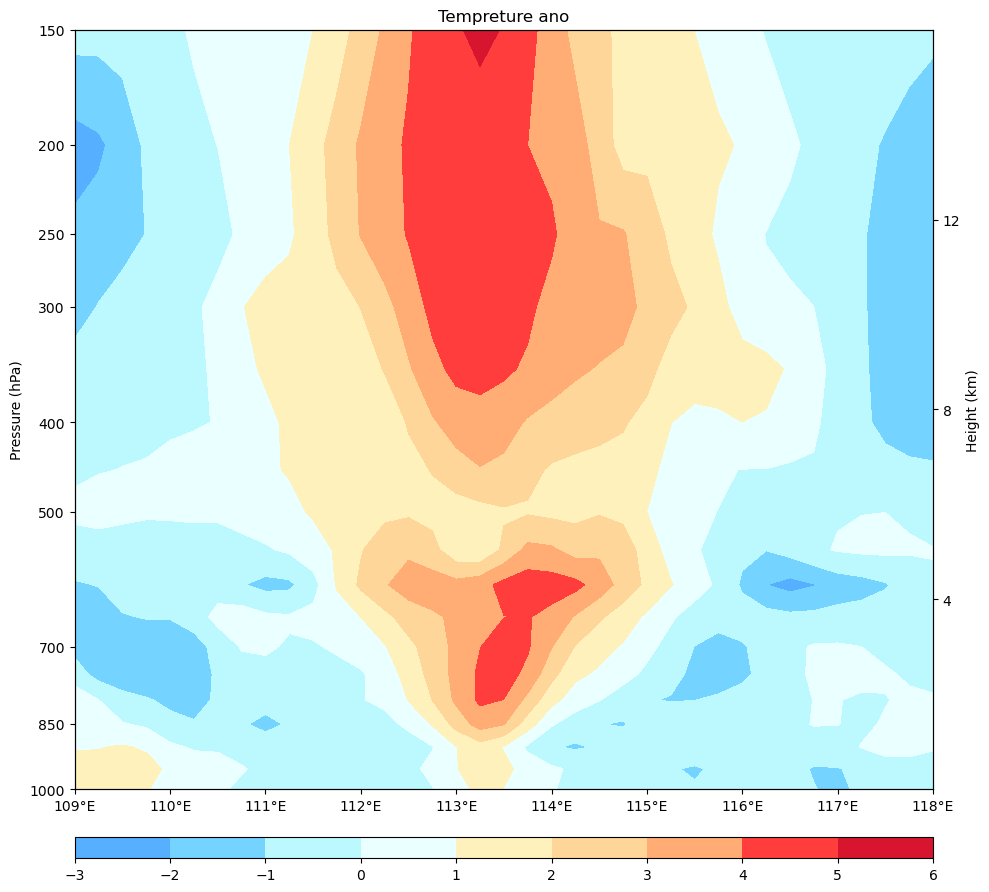

In [5]:
fig=plt.figure(figsize=(10,10))
ax=fig.subplots(1,1)
levels=[-3,-2,-1,0,1,2,3,4,5,6]
colors=['#56b0ff','#75d3ff','#bcf9ff','#eaffff','#fff1bc','#ffd699','#ffac75','#ff3d3d','#d8152f']
colorbar=ax.contourf(T['longitude'],T['level'].loc[150:],jupin1.loc[150:,:,113.25],levels=levels,colors=colors)
plt.colorbar(colorbar,location='bottom',pad=0.05,aspect=40)
#####横坐标显示维度
lon_formatter = LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
####纵坐标格式显示
ax.invert_yaxis()
ax.set_yscale('symlog')
##暴力显示
plt.yticks([1000, 850,700, 500, 400, 300,250,200,150], ["1000", "850", "700", "500", "400", "300", "250", "200","150"])
ax.set_ylabel('Pressure (hPa)')
ax2=ax.twinx()
ax2.set_yticks([0,4,8,12,16])
ax2.set_ylabel('Height (km)')
plt.yticks([4,8,12],['4','8','12'])
plt.title("Tempreture ano")
plt.tight_layout()
plt.savefig('./tcT.png')